In [17]:
# Import
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt

In [18]:
eng_emb = '/mnt/permanent/Language/Multi/FB/wiki.en/wiki.en.vec'
ita_emb = '/mnt/permanent/Language/Multi/FB/wiki.it/wiki.it.vec'
limit = None
limits_tr = [i*50000 for i in range(1, 16)]
limits_te = [i*50000 for i in range(1, 41)]

train_orig_fn = '/home/eszti/projects/dipterv/panlex/data/smith/original/train_eng_ita.tsv'
train_fn = '/home/eszti/projects/dipterv/panlex/data/smith/train/eng_ita.tsv'
valid_fn = '/home/eszti/projects/dipterv/panlex/data/smith/valid/eng_ita.tsv'
test_fn = '/home/eszti/projects/dipterv/panlex/data/smith/test/eng_ita.tsv'

figsize_x = 8
figsize_y = 4

In [19]:
def read_emb(emb_fn, limit):
    model = KeyedVectors.load_word2vec_format(emb_fn, binary=False, limit=limit)
    return model

In [20]:
def read_word_pairs_tsv(fn, id1, id2):
    wl1 = set()
    wl2 = set()
    with open(fn) as f:
        lines = f.readlines()
        data = [(line.split()[id1], line.split()[id2]) for i, line in enumerate(lines)]
    for (w1, w2) in data:
        wl1.add(w1)
        wl2.add(w2)
    return data, wl1, wl2

In [21]:
def check_emb_coverage(emb, wl, limits):
    found = [[] for i in limits]    
    for w in wl:
        n_from = 0
        n_to = len(limits)
        if w in emb:
            idx = emb.index2word.index(w)
            for i, l in enumerate(limits):
                if idx > l:
                    n_from = i + 1
        else:
            # do not add any of the found lists
            n_from = len(limits)
        for i in range(n_from, n_to):
            found[i].append(w)
    return found

In [22]:
def check_wp_coverage(wp_l, found1, found2, limits):
    found = [[] for i in limits]    
    for (w1, w2) in wp_l:
        for i, l in enumerate(limits):
            if w1 in found1[i] and w2 in found2[i]:
                found[i].append((w1, w2))
    return found

In [31]:
def plot_stat(lang, wl, found, stat, limits):
    print('{0} : {1}'.format(lang, len(wl)))
    for i, l in enumerate(limits):
        y = len(found[i])
        stat.append(y)
        print('limit - {0} : {1}'.format(l, y))
    print('not found: {}'.format(set(wl) - set(found[-1])))
    plot(limits, stat, lang, 'limits', 'found')

def make_stat(emb_en, emb_it, wl_en, wl_it, limits):
    found_en = check_emb_coverage(emb=emb_en, wl=wl_en, limits=limits)
    found_it = check_emb_coverage(emb=emb_it, wl=wl_it, limits=limits)

    stat_en = []
    stat_it = []

    plot_stat('en', wl_en, found_en, stat_en, limits)
    plot_stat('it', wl_it, found_it, stat_it, limits)
    return found_en, found_it, stat_en, stat_it

In [24]:
def plot(x, y, title, xlab, ylab):
    plt.figure(figsize=(figsize_x,figsize_y))    
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()
    plt.plot(x, y, 'o')
    plt.legend()
    plt.show()

In [25]:
m_en = read_emb(eng_emb, limit)
m_it = read_emb(ita_emb, limit)
len(m_en.index2word)
len(m_it.index2word)

2519370

871053

In [35]:
train_o_wp, tr_o_en, tr_o_it = read_word_pairs_tsv(train_orig_fn, 0, 1)
train_wp, tr_en, tr_it = read_word_pairs_tsv(train_fn, 0, 1)
valid_wp, va_en, va_it = read_word_pairs_tsv(valid_fn, 0, 1)
test_wp, te_en, te_it = read_word_pairs_tsv(test_fn, 0, 1)
print('train orig wps:\t{}'.format(len(train_o_wp)))
print('train orig en:\t{}'.format(len(tr_o_en)))
print('train orig it:\t{}'.format(len(tr_o_it)))
print('train wps:\t{}'.format(len(train_wp)))
print('train en:\t{}'.format(len(tr_en)))
print('train it:\t{}'.format(len(tr_it)))
print('valid wps:\t{}'.format(len(valid_wp)))
print('valid en:\t{}'.format(len(va_en)))
print('valid it:\t{}'.format(len(va_it)))
print('test wps:\t{}'.format(len(test_wp)))
print('test en:\t{}'.format(len(te_en)))
print('test it:\t{}'.format(len(te_it)))

train orig wps:	5000
train orig en:	3442
train orig it:	4549
train wps:	4500
train en:	3216
train it:	4134
valid wps:	500
valid en:	500
valid it:	499
test wps:	1869
test en:	1500
test it:	1849


### Train original

en : 3442
limit - 50000 : 3442
limit - 100000 : 3442
limit - 150000 : 3442
limit - 200000 : 3442
limit - 250000 : 3442
limit - 300000 : 3442
limit - 350000 : 3442
limit - 400000 : 3442
limit - 450000 : 3442
limit - 500000 : 3442
limit - 550000 : 3442
limit - 600000 : 3442
limit - 650000 : 3442
limit - 700000 : 3442
limit - 750000 : 3442
not found: set()


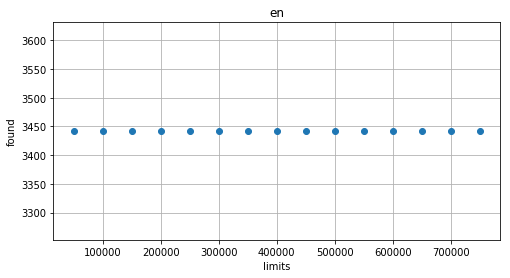

it : 4549
limit - 50000 : 4450
limit - 100000 : 4516
limit - 150000 : 4533
limit - 200000 : 4541
limit - 250000 : 4544
limit - 300000 : 4545
limit - 350000 : 4548
limit - 400000 : 4548
limit - 450000 : 4548
limit - 500000 : 4548
limit - 550000 : 4548
limit - 600000 : 4548
limit - 650000 : 4548
limit - 700000 : 4548
limit - 750000 : 4548
not found: {'prelaurea'}


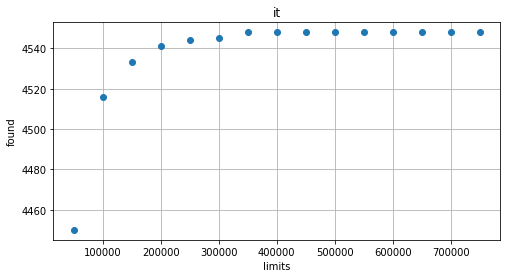

In [32]:
found_tr_o_en, found_tr_o_it, stat_tr_o_en, stat_tr_o_it = make_stat(m_en, m_it, tr_o_en, tr_o_it, limits_tr)

In [33]:
# proving that not found words are not in the embedding
'prelaurea' in m_it

False

### Train

en : 3216
limit - 50000 : 3216
limit - 100000 : 3216
limit - 150000 : 3216
limit - 200000 : 3216
limit - 250000 : 3216
limit - 300000 : 3216
limit - 350000 : 3216
limit - 400000 : 3216
limit - 450000 : 3216
limit - 500000 : 3216
limit - 550000 : 3216
limit - 600000 : 3216
limit - 650000 : 3216
limit - 700000 : 3216
limit - 750000 : 3216
not found: set()


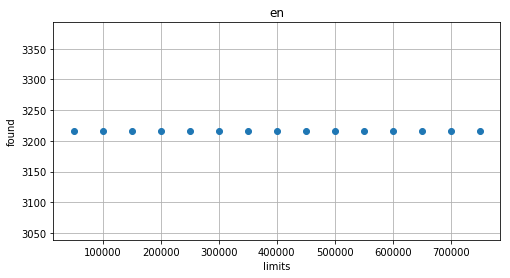

it : 4134
limit - 50000 : 4042
limit - 100000 : 4101
limit - 150000 : 4118
limit - 200000 : 4126
limit - 250000 : 4129
limit - 300000 : 4130
limit - 350000 : 4133
limit - 400000 : 4133
limit - 450000 : 4133
limit - 500000 : 4133
limit - 550000 : 4133
limit - 600000 : 4133
limit - 650000 : 4133
limit - 700000 : 4133
limit - 750000 : 4133
not found: {'prelaurea'}


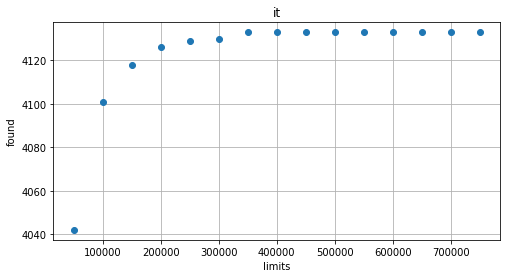

In [36]:
found_tr_en, found_tr_it, stat_tr_en, stat_tr_it = make_stat(m_en, m_it, tr_en, tr_it, limits_tr)

### Valid

en : 500
limit - 50000 : 500
limit - 100000 : 500
limit - 150000 : 500
limit - 200000 : 500
limit - 250000 : 500
limit - 300000 : 500
limit - 350000 : 500
limit - 400000 : 500
limit - 450000 : 500
limit - 500000 : 500
limit - 550000 : 500
limit - 600000 : 500
limit - 650000 : 500
limit - 700000 : 500
limit - 750000 : 500
not found: set()


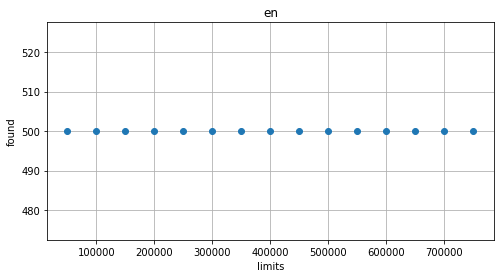

it : 499
limit - 50000 : 492
limit - 100000 : 499
limit - 150000 : 499
limit - 200000 : 499
limit - 250000 : 499
limit - 300000 : 499
limit - 350000 : 499
limit - 400000 : 499
limit - 450000 : 499
limit - 500000 : 499
limit - 550000 : 499
limit - 600000 : 499
limit - 650000 : 499
limit - 700000 : 499
limit - 750000 : 499
not found: set()


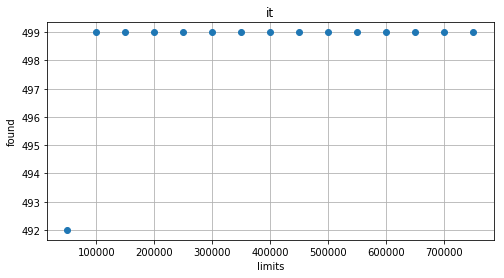

In [37]:
found_va_en, found_va_it, stat_va_en, stat_va_it = make_stat(m_en, m_it, va_en, va_it, limits_tr)

### Test

en : 1500
limit - 50000 : 928
limit - 100000 : 1211
limit - 150000 : 1348
limit - 200000 : 1403
limit - 250000 : 1443
limit - 300000 : 1458
limit - 350000 : 1473
limit - 400000 : 1477
limit - 450000 : 1484
limit - 500000 : 1487
limit - 550000 : 1489
limit - 600000 : 1489
limit - 650000 : 1490
limit - 700000 : 1490
limit - 750000 : 1491
limit - 800000 : 1493
limit - 850000 : 1494
limit - 900000 : 1496
limit - 950000 : 1496
limit - 1000000 : 1497
limit - 1050000 : 1497
limit - 1100000 : 1498
limit - 1150000 : 1498
limit - 1200000 : 1498
limit - 1250000 : 1498
limit - 1300000 : 1498
limit - 1350000 : 1499
limit - 1400000 : 1499
limit - 1450000 : 1499
limit - 1500000 : 1499
limit - 1550000 : 1499
limit - 1600000 : 1499
limit - 1650000 : 1499
limit - 1700000 : 1500
limit - 1750000 : 1500
limit - 1800000 : 1500
limit - 1850000 : 1500
limit - 1900000 : 1500
limit - 1950000 : 1500
limit - 2000000 : 1500
not found: set()


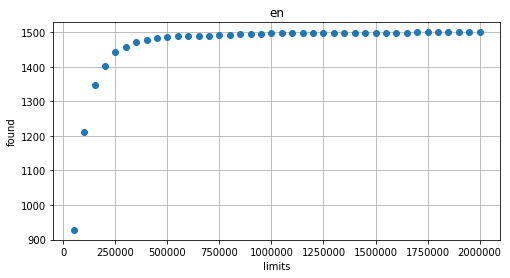

it : 1849
limit - 50000 : 1103
limit - 100000 : 1447
limit - 150000 : 1605
limit - 200000 : 1693
limit - 250000 : 1750
limit - 300000 : 1782
limit - 350000 : 1806
limit - 400000 : 1815
limit - 450000 : 1826
limit - 500000 : 1830
limit - 550000 : 1835
limit - 600000 : 1839
limit - 650000 : 1842
limit - 700000 : 1843
limit - 750000 : 1845
limit - 800000 : 1845
limit - 850000 : 1846
limit - 900000 : 1846
limit - 950000 : 1846
limit - 1000000 : 1846
limit - 1050000 : 1846
limit - 1100000 : 1846
limit - 1150000 : 1846
limit - 1200000 : 1846
limit - 1250000 : 1846
limit - 1300000 : 1846
limit - 1350000 : 1846
limit - 1400000 : 1846
limit - 1450000 : 1846
limit - 1500000 : 1846
limit - 1550000 : 1846
limit - 1600000 : 1846
limit - 1650000 : 1846
limit - 1700000 : 1846
limit - 1750000 : 1846
limit - 1800000 : 1846
limit - 1850000 : 1846
limit - 1900000 : 1846
limit - 1950000 : 1846
limit - 2000000 : 1846
not found: {'kostunica', 'oligopolistica', 'ridimensioni'}


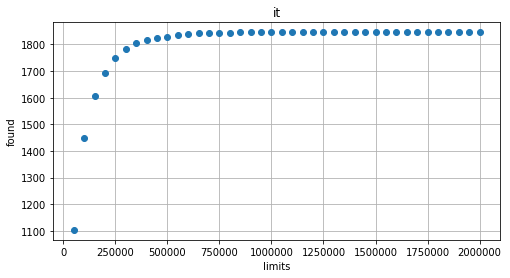

In [38]:
found_te_en, found_te_it, stat_te_en, stat_te_it = make_stat(m_en, m_it, te_en, te_it, limits_te)

In [39]:
# proving that not found words are not in the embedding
'ridimensioni' in m_it
'kostunica' in m_it
'oligopolistica' in m_it

False

False

False

### Train orig word pairs

In [43]:
def plot_wp_stat(mode, wp_l, limits, found):
    stat = []
    print('{0} : {1}'.format(mode, len(wp_l)))
    for i, l in enumerate(limits):
        y = len(found[i])
        stat.append(y)
        print('limit - {0} : {1}'.format(l, y))
    print('not found: {}'.format(set(wp_l) - set(found[-1])))
    plot(limits, stat, '{} word pairs'.format(mode), 'limits', 'found')
    return stat

In [41]:
found_tr_o_wp = check_wp_coverage(train_o_wp, found_tr_o_en, found_tr_o_it, limits_tr)
found_tr_wp = check_wp_coverage(train_wp, found_tr_en, found_tr_it, limits_tr)
found_va_wp = check_wp_coverage(valid_wp, found_va_en, found_va_it, limits_tr)
found_te_wp = check_wp_coverage(test_wp, found_te_en, found_te_it, limits_te)

train orig : 5000
limit - 50000 : 4900
limit - 100000 : 4967
limit - 150000 : 4984
limit - 200000 : 4992
limit - 250000 : 4995
limit - 300000 : 4996
limit - 350000 : 4999
limit - 400000 : 4999
limit - 450000 : 4999
limit - 500000 : 4999
limit - 550000 : 4999
limit - 600000 : 4999
limit - 650000 : 4999
limit - 700000 : 4999
limit - 750000 : 4999
not found: {('undergraduate', 'prelaurea')}


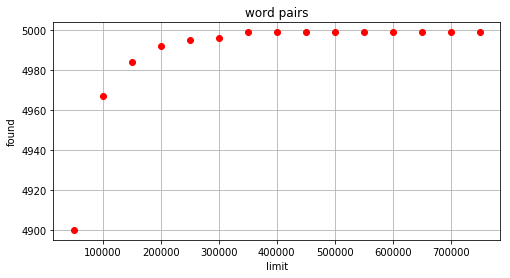

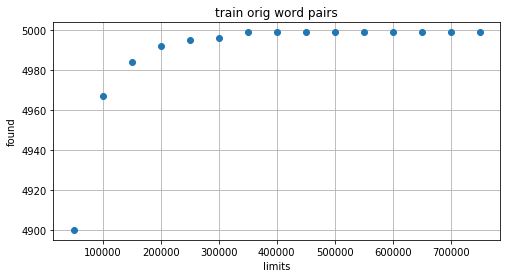

train : 4500
limit - 50000 : 4407
limit - 100000 : 4467
limit - 150000 : 4484
limit - 200000 : 4492
limit - 250000 : 4495
limit - 300000 : 4496
limit - 350000 : 4499
limit - 400000 : 4499
limit - 450000 : 4499
limit - 500000 : 4499
limit - 550000 : 4499
limit - 600000 : 4499
limit - 650000 : 4499
limit - 700000 : 4499
limit - 750000 : 4499
not found: {('undergraduate', 'prelaurea')}


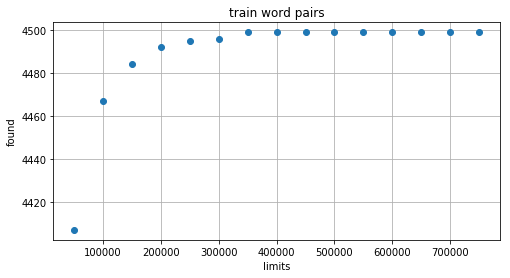

valid : 500
limit - 50000 : 493
limit - 100000 : 500
limit - 150000 : 500
limit - 200000 : 500
limit - 250000 : 500
limit - 300000 : 500
limit - 350000 : 500
limit - 400000 : 500
limit - 450000 : 500
limit - 500000 : 500
limit - 550000 : 500
limit - 600000 : 500
limit - 650000 : 500
limit - 700000 : 500
limit - 750000 : 500
not found: set()


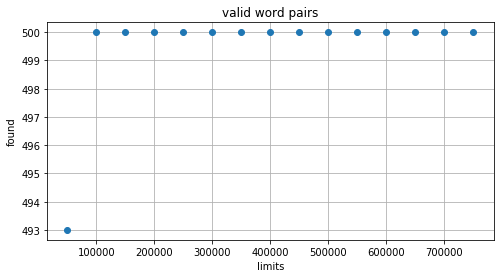

test : 1869
limit - 50000 : 993
limit - 100000 : 1342
limit - 150000 : 1536
limit - 200000 : 1640
limit - 250000 : 1728
limit - 300000 : 1769
limit - 350000 : 1804
limit - 400000 : 1816
limit - 450000 : 1833
limit - 500000 : 1839
limit - 550000 : 1845
limit - 600000 : 1849
limit - 650000 : 1852
limit - 700000 : 1853
limit - 750000 : 1856
limit - 800000 : 1859
limit - 850000 : 1861
limit - 900000 : 1863
limit - 950000 : 1863
limit - 1000000 : 1863
limit - 1050000 : 1863
limit - 1100000 : 1864
limit - 1150000 : 1864
limit - 1200000 : 1864
limit - 1250000 : 1864
limit - 1300000 : 1864
limit - 1350000 : 1865
limit - 1400000 : 1865
limit - 1450000 : 1865
limit - 1500000 : 1865
limit - 1550000 : 1865
limit - 1600000 : 1865
limit - 1650000 : 1865
limit - 1700000 : 1866
limit - 1750000 : 1866
limit - 1800000 : 1866
limit - 1850000 : 1866
limit - 1900000 : 1866
limit - 1950000 : 1866
limit - 2000000 : 1866
not found: {('oligopolistic', 'oligopolistica'), ('downsize', 'ridimensioni'), ('kostunic

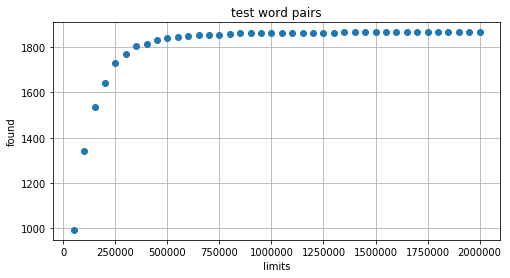

In [49]:
stat_tr_o_wp = plot_wp_stat('train orig', train_o_wp, limits_tr, found_tr_o_wp)
stat_tr_wp = plot_wp_stat('train', train_wp, limits_tr, found_tr_wp)
stat_va_wp = plot_wp_stat('valid', valid_wp, limits_tr, found_va_wp)
stat_te_wp = plot_wp_stat('test', test_wp, limits_te, found_te_wp)

In [47]:
def _print(mode, name1, name2, limits, stat1, stat2, wl1, wl2):
    plt.figure(figsize=(figsize_x, figsize_y))
    plt.title(mode)
    plt.xlabel('limit')
    plt.ylabel('found')
    plt.grid()
    plt.plot(limits, stat1, 'ro', label='{0}: {1}'.format(name1, len(wl1)))
    plt.plot(limits, stat2, 'bo', label='{0}: {1}'.format(name2, len(wl2)))
    plt.legend()
    plt.show()

def print_all():
    _print('train orig', 'en', 'it', limits_tr, stat_tr_o_en, stat_tr_o_it, tr_o_en, tr_o_it)
    _print('train', 'en', 'it', limits_tr, stat_tr_en, stat_tr_it, tr_en, tr_it)
    _print('valid', 'en', 'it', limits_tr, stat_va_en, stat_va_it, va_en, va_it)
    _print('test', 'en', 'it', limits_te, stat_te_en, stat_te_it, te_en, te_it)
    
    plt.figure(figsize=(figsize_x,figsize_y))
    plt.title('word pairs')
    plt.xlabel('limit')
    plt.ylabel('found')
    plt.grid()
    plt.plot(limits_tr, stat_tr_o_wp, 'ro', label='train orig: {}'.format(len(train_o_wp)))
    plt.plot(limits_te, stat_te_wp, 'bo', label='test orig: {}'.format(len(test_wp)))
    plt.legend()
    plt.show()

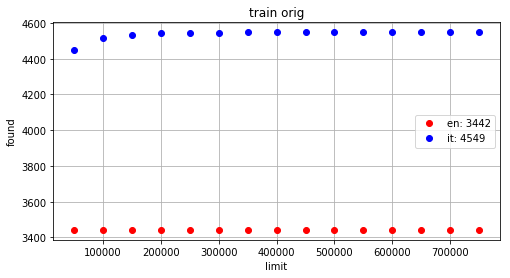

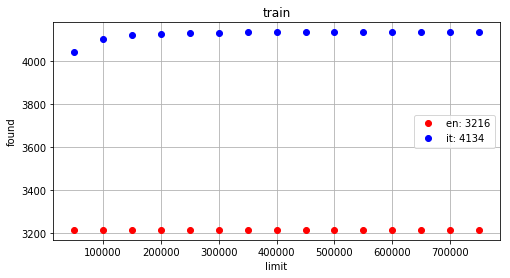

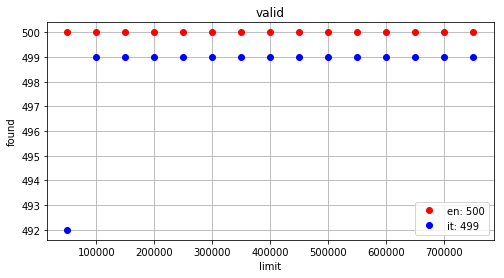

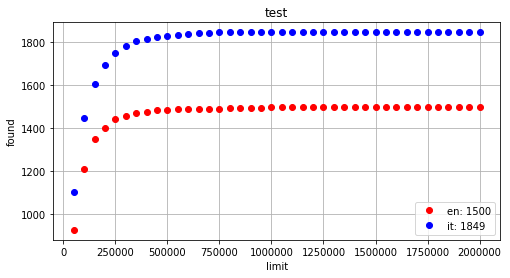

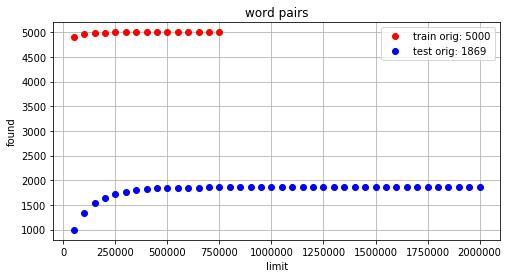

In [50]:
print_all()